In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, average_precision_score
import scipy.sparse as sp
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Data Prep

# Visualize Model Predictions

In [2]:
%cd ~/structure-encoding/dgvae
%run train_generate

/Users/kieran/structure-encoding/dgvae


RDKit ERROR: [14:09:36] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:09:36] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit WARNING: [14:09:36] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [14:09:36] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:09:36] WARNING: not removing hydrogen atom without neighbors
[14:09:36] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit WARNING: [14:09:36] WARNING: not removing hydrogen atom without neighbors
[14:09:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:36] WARNING: not removing hydrogen atom without neighbors
[14:09:36] WARNING: not removing hydrogen atom without neighbors
[14:09:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:09:

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
targets is deprecated, use labels instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


2022-05-27 14:09:44.584585: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-27 14:09:44.601042: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Epoch: 0001 train_loss= 2.31720 train_acc= 0.52652 val_roc= 0.92907 val_ap= 0.68183 reconstruction error= 0.51444 log_like= 0.81973 RMSE= 0.66919 time= 3.03208
Epoch: 0002 train_loss= 2.29805 train_acc= 0.52674 val_roc= 0.94442 val_ap= 0.73369 reconstruction error= 0.50790 log_like= 0.80778 RMSE= 0.67121 time= 3.96279
Epoch: 0003 train_loss= 2.28530 train_acc= 0.51596 val_roc= 0.96046 val_ap= 0.79180 reconstruction error= 0.49675 log_like= 0.81182 RMSE= 0.59981 time= 3.27073
Epoch: 0004 train_loss= 2.28305 train_acc= 0.52284 val_roc= 0.95328 val_ap= 0.75159 reconstruction error= 0.50270 log_like= 0.80446 RMSE= 0.62448 time= 3.51228
Epoch: 0005 train_loss= 2.25669 train_acc= 0.52720 val_roc= 0.96335 val_ap= 0.81131 reconstruction error= 0.48445 log_like= 0.80892 RMSE= 0.58937 time= 3.16834
Epoch: 0006 train_loss= 2.27721 train_acc= 0.53489 val_roc= 0.96163 val_ap= 0.79263 reconstruction error= 0.47113 log_like= 0.80132 RMSE= 0.54709 time= 2.87321
Epoch: 0007 train_loss= 2.27055 train_ac

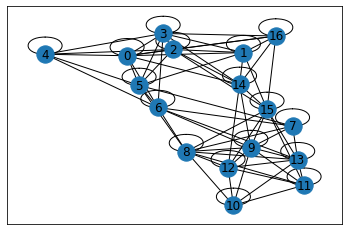

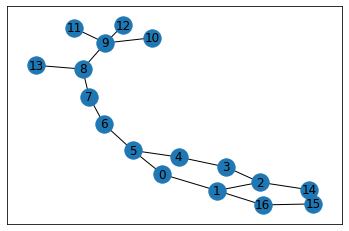

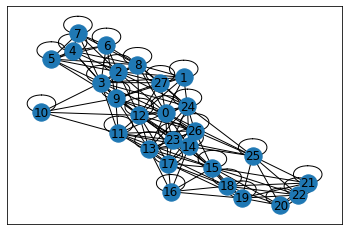

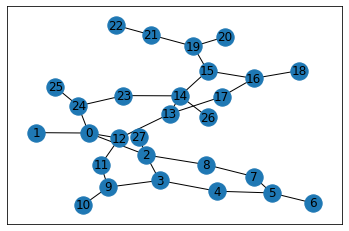

In [4]:
def sigmoid(x):
    return .5 * (1 + np.tanh(.5 * x))

for idx, adj in enumerate(graph_val[0:2]):
    feed_dict = construct_feed_dict(adj_norms_val[idx], adj_labels_val[idx], features, placeholders)
    feed_dict.update({placeholders['dropout']: 0})
    emb = sess.run(model.z_mean, feed_dict=feed_dict)
    adj_rec = np.dot(emb, emb.T)
    size = val_size[idx]
    preds_all = adj_rec[:size, :size]
    pred_matrix = np.round(sigmoid(preds_all))
    G = nx.from_numpy_matrix(pred_matrix)
    nx.draw_networkx(G)
    plt.show()
    G = nx.from_numpy_matrix(adj[:size, :size])
    nx.draw_networkx(G)
    plt.show()

In [ ]:
adj